In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import sys

Batch = 4000
sizeTest = 100
SizeTrain = Batch - sizeTest

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('TrainSet', download=True, train=True, transform=transform)
valset = datasets.MNIST('ValSet', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=Batch, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()
np.set_printoptions(threshold=sys.maxsize)

for i in range(4000):
    for r in range(28):
        for c in range(28):
            if (images[i][0][r][c] > .15):
                images[i][0][r][c] = .5
            else:
                images[i][0][r][c] = -1


images = np.resize(images,(Batch,784))
X = images[0:SizeTrain,:]
Y = labels.numpy()[0:SizeTrain]


new_column = np.ones(SizeTrain)
X = np.column_stack([X, new_column])

Xval = images[SizeTrain:Batch,:]
Yval = labels[SizeTrain:Batch]

new_column = np.ones(sizeTest)
Xval = np.column_stack([Xval, new_column])

In [2]:
newY = np.zeros(shape=(SizeTrain,10))
for i in range(Y.shape[0]):
    newY[i,Y[i]] = 1


In [3]:
import numpy as np

# Number of classes
K = 10

# Number of features
N = 785

# Initialize weights
weights = np.random.rand(K,N)

#Training Iterations
trainIters = 1000

cost = np.zeros(trainIters)

# sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x/100))

# Training method
def one_vs_all_logreg(X, y, K, weights, learning_rate, lamb):
    
    # Number of training examples
    m = X.shape[0]
    
    for i in range(trainIters):
    # Initialize the cost
      J = 0
      
      # Compute the hypothesis
      h = np.dot(X, weights.T)

      # Compute the cost
      for k in range(K):
          temp = -y[:,k] * np.log(sigmoid(h[:,k])) - (1 - y[:,k]) * np.log(1.000001 - sigmoid(h[:,k]))
          J += np.sum(temp)

          g = np.dot(X. T, (sigmoid(h)[:,k] - y[:,k]))
          g = g/m
          g = g + (lamb / m * np.max(weights[1:,k]))
          

          #update weights 
          weights[k] = weights[k] - learning_rate * g
          
      J += ((lamb / 2) * np.sum(np.square(weights[1:,k])))
      J = J/m
      cost[i] = J

    return weights

theta = one_vs_all_logreg(X, newY, K, weights, 20, .00000001)

In [5]:
def predict(X, weights):
    return np.argmax(sigmoid(np.dot(X, weights.T)), axis=1)

pred = predict(X, theta)
predTest = predict(Xval, theta)


In [31]:
import numpy as np
img = np.zeros((24,24))

def imageToVecotr(image):
    vec = np.ones(785)
    vec1 = np.resize(image,(1,784))
    vec[1:] = vec1
    return vec

print(imageToVecotr(img))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [7]:
numFalse = 0
for i in range(predTest.shape[0]):
    if predTest[i] == Yval[i]:
        numFalse = numFalse
    else:
        numFalse = numFalse + 1
print(numFalse/sizeTest)

0.15


In [ ]:
image = np.zeros((28,28))

for i in range(len(pixelList)):
    tup = pixelList.pop()
    image[int((tup[1] + 200) / 28)][int((tup[0] - 1200) / 28)] = 1.5

image = image - 1

vec = np.ones(785)
vec1 = np.resize(image,(1,784))
vec[1:] = vec1

In [9]:
print(vec)

NameError: name 'vec' is not defined

In [14]:
numFalse = 0
for i in range(pred.shape[0]):
    if pred[i] == Y[i]:
        numFalse = numFalse
    else:
        numFalse = numFalse + 1
print(numFalse/SizeTrain)

0.07564102564102564


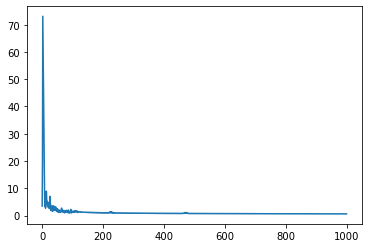

In [15]:
from matplotlib import pyplot as plt

plt.plot(cost)
plt.show()

In [7]:
tup = (1,2,3,4)
print(tup)

(1, 2, 3, 4)


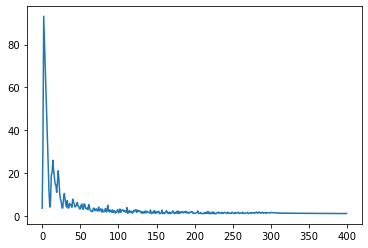

Percent incorrect in the validation set0.22


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\yotam\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\yotam\AppData\Local\Temp\ipykernel_14520\1787236690.py", line 175, in AddDigitClicked
    makeCanvas()
  File "C:\Users\yotam\AppData\Local\Temp\ipykernel_14520\1787236690.py", line 202, in makeCanvas
    adf = makeLst(Xval[1])
  File "C:\Users\yotam\AppData\Local\Temp\ipykernel_14520\1839966427.py", line 19, in makeLst
    print(arr[i][k])
TypeError: 'NoneType' object is not subscriptable


In [26]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from matplotlib import pyplot as plt
from tkinter import *



Batch = 4000
sizeTest = 100
SizeTrain = Batch - sizeTest

transform = transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.5,), (0.5,)),
                            ])

trainset = datasets.MNIST('TrainSet', download=True, train=True, transform=transform)
valset = datasets.MNIST('ValSet', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=Batch, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

#initializing the test and validation sets
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()

#
for i in range(4000):
    for r in range(28):
        for c in range(28):
            if (images[i][0][r][c] > .17):
                images[i][0][r][c] = .5
            else:
                images[i][0][r][c] = -1

VisImg = images
images = np.resize(images,(Batch,784))

X = images[0:SizeTrain,:]
Y = labels.numpy()[0:SizeTrain]

new_column = np.ones(SizeTrain)
X = np.column_stack([X, new_column])

Xval = images[SizeTrain:Batch,:]
Yval = labels[SizeTrain:Batch]

new_column = np.ones(sizeTest)
Xval = np.column_stack([Xval, new_column])

#makes the lables batchSize x 10 matrix qith 0's and 1's
Yvec = np.zeros(shape=(SizeTrain,10))
for i in range(Y.shape[0]):
    Yvec[i,Y[i]] = 1


def ShowData():
    # Training method
    def one_vs_all_logreg(X, y, learning_rate, lamb):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x/100))
        
        # Number of classes
        K = 10

        # Number of features
        N = 785

        # Initialize weights
        weights = np.random.rand(K,N)

        #Training Iterations
        trainIters = 400

        cost = np.zeros(trainIters)


        # Number of training examples
        m = X.shape[0]
        
        for i in range(trainIters):
            
            # Initialize the cost
            J = 0
            
            # Compute the hypothesis
            h = np.dot(X, weights.T)

            # Compute the cost
            for k in range(K):
                temp = -y[:,k] * np.log(sigmoid(h[:,k])) - (1 - y[:,k]) * np.log(1.000001 - sigmoid(h[:,k]))
                J += np.sum(temp)

                g = np.dot(X. T, (sigmoid(h)[:,k] - y[:,k]))
                g = g/m
                g = g + (lamb / m * np.max(weights[1:,k]))
                

                #update weights 
                weights[k] = weights[k] - learning_rate * g
                
            J += ((lamb / 2) * np.sum(np.square(weights[1:,k])))
            J = J / m
            cost[i] = J



        return (weights, cost)

    def predict(X, weights):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x/100))
        
        return np.argmax(sigmoid(np.dot(X, weights.T)), axis=1)

    theta = one_vs_all_logreg(X, Yvec, 20, .00000001)

    #plots cost
    costList = theta[1]
    plt.plot(costList)
    plt.show()

    weightMat = theta[0]


    #checks the model on the validation set
    predTest = predict(Xval, weightMat)
    numTestFalse = 0
    for i in range(predTest.shape[0]):
        if predTest[i] != Yval[i]:
            numTestFalse += 1

    print("Percent incorrect in the validation set" + str(numTestFalse/sizeTest))

    return weightMat

def predict(X, weights):
    def sigmoid(x):
        return 1 / (1 + np.exp(-x/100))
    
    return np.argmax(sigmoid(np.dot(weights, X)))

def imageToVecotr(image):
    vec = np.ones(785)
    vec1 = np.resize(image,(1,784))
    vec[1:] = vec1
    return vec

def makeMainMenu():
    frm = Tk()

    canvas_width = 200
    canvas_height = 400

    buttonHeight = 2
    buttonWidth = 10

    message = Label(frm, text = "Your number is:",font = "Bold", bg = "#b6d7a8", width = 200, height = 15)
    message.pack()

    canvas = Canvas(frm,
            width=canvas_width,
            height=canvas_height)
    canvas.pack(expand=YES, fill=BOTH)

    def resetClicked():
        print("reset has been clicked")

    def AddDigitClicked():
        frm.destroy()
        makeCanvas()

    ResetButton = Button(frm, text = "Rest", font = "Bold", bg = "Blue", command = resetClicked, width = buttonWidth, height = buttonHeight)
    ResetButton.place(x = 25,y = 600)

    AddDigitButton = Button(frm, text = "Add Digit", font = "Bold", bg = "Blue", command = AddDigitClicked, width = buttonWidth, height = buttonHeight)
    AddDigitButton.place(x = 1675,y = 600)

def makeCanvas():
    pixelList = []
    frm = Tk()

    canvas_width = 200
    canvas_height = 400

    buttonHeight = 2
    buttonWidth = 10

    message = Label(frm, text="write the digit you wish to add", font = "Bold", bg = "#b6d7a8", width = 200, height=15)
    message.pack(side=TOP)

    canvas = Canvas(frm,
            width=canvas_width,
            height=canvas_height)
    canvas.pack(expand=YES, fill=BOTH)

    #testing
    adf = makeLst(Xval[1])
    drw(adf, canvas)

    def paint(event):
        blackHex = "#000000"
        x1, y1 = (event.x -4), (event.y - 4)
        x2, y2 = (event.x + 4), (event.y + 4)
        canvas.create_oval(x1, y1, x2, y2, fill=blackHex)

        if (event.x > 600 and event.x <= 1800):
            pixelList.append((event.x, event.y))

    def cancelClicked():
        frm.destroy()
        makeMainMenu()

    def AddClicked():
        makeImage(pixelList)
        vec = imageToVecotr(image)
        print(predict(vec,theta))
        

    cancelButton = Button(frm, text = "Cancel", font = "Bold", bg = "Blue", command = cancelClicked, width = buttonWidth, height = buttonHeight)
    cancelButton.place(x = 25,y = 600)

    AddButton = Button(frm, text = "Add", font = "Bold", bg = "Blue", command = AddClicked, width = buttonWidth, height = buttonHeight)
    AddButton.place(x = 1675,y = 600)

    canvas.bind("<B1-Motion>", paint)


def _makeImage(lst):
    size = 28

    startX = 500
    endX = 1900
    sizeX = int((endX - startX) / size)

    startY = 0
    endY = 420
    sizeY = int((endY - startY) / size)

#compresses the images
def makeImage(lst):
    image = np.zeros((28,28))
    image = image - 1

    for i in range(len(lst)):
        tup = lst.pop()
        image[int((tup[1] + 200) / 28)][int((tup[0] - 1200) / 28)] = 1


#code starts here
theta = ShowData()
image = np.zeros((28,28))


makeMainMenu()
mainloop()

In [25]:
from tkinter import *
import numpy as np

def drw(lst, canvas):
    for i in range(len(lst)):
        tup = lst.pop()
        x = tup[0]
        y = tup[1]
        blackHex = "#000000"
        x1, y1 = (x -4), (y - 4)
        x2, y2 = (x + 4), (y + 4)
        canvas.create_oval(x1, y1, x2, y2, fill=blackHex)

def makeLst(vec):
    lst = []
    arr = vec[1:].resize((28,28))
    for i in range(28):
        for k in range(28):
            if (arr[i][k] == .5):
                lst.append((i * 50 + 500, k * 15))
    
    return lst
